# Atividade Mineração de Dados


O governo brasileiro protege as áreas naturais por meio de Unidades de Conservação (UC) - estratégia extremamente eficaz para a manutenção dos recursos naturais em longo prazo. Para atingir esse objetivo de forma efetiva e eficiente, foi instituído o Sistema Nacional de Conservação da Natureza (SNUC), com a promulgação da Lei nº 9.985, de 18 de julho de 2000. A Lei do SNUC representou grandes avanços à criação e gestão das UC nas três esferas de governo (federal, estadual e municipal), pois ele possibilita uma visão de conjunto das áreas naturais a serem preservadas. Além disso, estabeleceu mecanismos que regulamentam a participação da sociedade na gestão das UC, potencializando a relação entre o Estado, os cidadãos e o meio ambiente.

O documento contem a lista das UCs ativas no CNUC com respectivas categorias de manejo, área, esfera de governo e ano de criação; Tabela consolidada por categoria de manejo, bioma e esfera. * Foram identificadas inconsistências nos campos sobre plano de manejo e conselho gestor da versão de fevereiro de 2024. Uma atualização com correções foi realizada em 14/05/2024 (fonte: dados.gov.br).

- Documento coletado no endereço https://dados.gov.br/dados/conjuntos-dados/unidadesdeconservacao


# 1º Etapa: Limpar e Organizar o DF

## Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Encontrando informações sobre o dataset

In [2]:
# Lendo as informações básicas
df = pd.read_csv('/content/cnuc_2024_02-2.csv', sep=';')
df.head(2)

,ID_UC,Código UC,Informações Gerais,Nome da UC,Esfera Administrativa,Categoria de Manejo,Categoria IUCN,UF,Ano do ato legal mais recente,Ato Legal de Criação,...,Mosaico,Reserva da Biosfera,Sobreposição com TI ou TQ,Biomas Abrangidos,Região,Presente na versão anterior,Diferença Área,Razão Diferença Área,Qualidade dos dados georreferenciados,Data da última certificação dos dados pelo Órgão Gestor
0,1,0000.00.0001,NaN,ÁREA DE PROTEÇÃO AMBIENTAL ANHATOMIRIM,Federal,Área de Proteção Ambiental,Category V,SC,1992,Decreto 528 de 20/05/1992,...,NaN,RB - Mt Atlântica,NaN,NaN,NaN,1,0,NaN,Polígono corresponde ao memorial descritivo,"segunda-feira, 30 de outubro de 2023"
1,2,0000.00.0002,NaN,ÁREA DE PROTEÇÃO AMBIENTAL CAVERNAS DO PERUAÇU,Federal,Área de Proteção Ambiental,Category V,MG,1989,Decreto 98182 de 26/09/1989,...,Sertão Veredas-Peruaçu,"RB - Caatinga, RB - Mt Atlântica",NaN,NaN,NaN,1,0,NaN,Polígono corresponde ao memorial descritivo,"sexta-feira, 23 de abril de 2010"


In [3]:
# Lendo as informações básicas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2945 entries, 0 to 2944
Data columns (total 51 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   ID_UC                                                    2945 non-null   int64  
 1   Código UC                                                2945 non-null   object 
 2   Informações Gerais                                       0 non-null      float64
 3   Nome da UC                                               2945 non-null   object 
 4   Esfera Administrativa                                    2945 non-null   object 
 5   Categoria de Manejo                                      2945 non-null   object 
 6   Categoria IUCN                                           2945 non-null   object 
 7   UF                                                       2945 non-null   object 
 8   Ano do ato legal mais recent

## Trabalhando com as linhas e colunas vazias

In [4]:
# Verificando a quantidade de linhas vazias
empty_rows = df[df.isna().any(axis=1)]
empty_rows.count()

,0
ID_UC,2945
Código UC,2945
Informações Gerais,0
Nome da UC,2945
Esfera Administrativa,2945
Categoria de Manejo,2945
Categoria IUCN,2945
UF,2945
Ano do ato legal mais recente,2945
Ato Legal de Criação,2945


In [5]:
# Eliminando as colunas vazias ou com muitos dados vazios. Coloquei um limiar de 50% de dados faltante.

def drop_columns_with_missing_data(df):
    # Calcula o número de linhas que representam 50% do DataFrame
    threshold = len(df) * 0.5

    # Elimina as colunas que têm mais de 50% de dados faltantes
    df = df.dropna(thresh=threshold, axis=1)

    return df

# Uso da função
df = drop_columns_with_missing_data(df)
df.head(2)

,ID_UC,Código UC,Nome da UC,Esfera Administrativa,Categoria de Manejo,Categoria IUCN,UF,Ano do ato legal mais recente,Ato Legal de Criação,Outros atos legais,...,PI,US,Mar Territorial,Município Costeiro,Município Costeiro + Área Marinha,Reserva da Biosfera,Presente na versão anterior,Diferença Área,Qualidade dos dados georreferenciados,Data da última certificação dos dados pelo Órgão Gestor
0,1,0000.00.0001,ÁREA DE PROTEÇÃO AMBIENTAL ANHATOMIRIM,Federal,Área de Proteção Ambiental,Category V,SC,1992,Decreto 528 de 20/05/1992,Sem informação.,...,0,1,1,1,1,RB - Mt Atlântica,1,0,Polígono corresponde ao memorial descritivo,"segunda-feira, 30 de outubro de 2023"
1,2,0000.00.0002,ÁREA DE PROTEÇÃO AMBIENTAL CAVERNAS DO PERUAÇU,Federal,Área de Proteção Ambiental,Category V,MG,1989,Decreto 98182 de 26/09/1989,Sem informação.,...,0,1,0,0,0,"RB - Caatinga, RB - Mt Atlântica",1,0,Polígono corresponde ao memorial descritivo,"sexta-feira, 23 de abril de 2010"


In [6]:
def drop_colunns(df):
  # Eliminando as colunas que não serão utilizadas
  df = df.drop(columns=['Código UC' , 'Fonte da Área: (1 = SHP, 0 = Ato legal)',
                   'PI', 'US', 'Presente na versão anterior', 'Outros atos legais', 'Presente na versão anterior',
                   'Qualidade dos dados georreferenciados',  '% Além da linha de costa', 'Mar Territorial',
                   'Município Costeiro', 'Município Costeiro + Área Marinha'])
  return df

# Uso da função
df = drop_colunns(df)
df.head(2)

,ID_UC,Nome da UC,Esfera Administrativa,Categoria de Manejo,Categoria IUCN,UF,Ano do ato legal mais recente,Ato Legal de Criação,Municípios Abrangidos,Plano de Manejo,...,Cerrado,Mata Atlântica,Pampa,Pantanal,Área Marinha,Bioma declarado,Grupo,Reserva da Biosfera,Diferença Área,Data da última certificação dos dados pelo Órgão Gestor
0,1,ÁREA DE PROTEÇÃO AMBIENTAL ANHATOMIRIM,Federal,Área de Proteção Ambiental,Category V,SC,1992,Decreto 528 de 20/05/1992,GOVERNADOR CELSO RAMOS (SC),Sim,...,"0,00","1870,00","0,00","0,00","2567,00",Área Marinha,Uso Sustentável,RB - Mt Atlântica,0,"segunda-feira, 30 de outubro de 2023"
1,2,ÁREA DE PROTEÇÃO AMBIENTAL CAVERNAS DO PERUAÇU,Federal,Área de Proteção Ambiental,Category V,MG,1989,Decreto 98182 de 26/09/1989,BONITO DE MINAS (MG) - CÔNEGO MARINHO (MG) - I...,Não,...,"116734,00","0,00","0,00","0,00","0,00",Cerrado,Uso Sustentável,"RB - Caatinga, RB - Mt Atlântica",0,"sexta-feira, 23 de abril de 2010"


In [7]:
# Reimprimindo os dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2945 entries, 0 to 2944
Data columns (total 27 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   ID_UC                                                    2945 non-null   int64 
 1   Nome da UC                                               2945 non-null   object
 2   Esfera Administrativa                                    2945 non-null   object
 3   Categoria de Manejo                                      2945 non-null   object
 4   Categoria IUCN                                           2945 non-null   object
 5   UF                                                       2945 non-null   object
 6   Ano do ato legal mais recente                            2945 non-null   int64 
 7   Ato Legal de Criação                                     2945 non-null   object
 8   Municípios Abrangidos                 

## Corrigindo as colunas

## Tirando os espaços dos nomes das colunas

In [8]:
# tirei os espaços vazios entre os nomes das colunas

def replace_spaces_with_underscore(df):
    df.columns = df.columns.str.replace(' ', '_')
    return df

# Uso da função
df = replace_spaces_with_underscore(df)
print(df.columns)

Index(['ID_UC', 'Nome_da_UC', 'Esfera_Administrativa', 'Categoria_de_Manejo',
       'Categoria_IUCN', 'UF', 'Ano_do_ato_legal_mais_recente',
       'Ato_Legal_de_Criação', 'Municípios_Abrangidos', 'Plano_de_Manejo',
       'Conselho_Gestor', 'Órgão_Gestor', 'Área_soma_biomas',
       'Área_soma_Biomas_Continental', 'Área_Ato_Legal_de_Criação', 'Amazônia',
       'Caatinga', 'Cerrado', 'Mata_Atlântica', 'Pampa', 'Pantanal',
       'Área_Marinha', 'Bioma_declarado', 'Grupo', 'Reserva_da_Biosfera',
       'Diferença_Área',
       'Data_da_última_certificação_dos_dados_pelo_Órgão_Gestor'],
      dtype='object')


## Eliminando dados duplicados

In [9]:
def remove_duplicatas(df):
    # Verifica se existem linhas duplicadas
    if df.duplicated().any():
        print("As linhas duplicadas são:")
        print(df[df.duplicated(keep=False)])
        df = df.drop_duplicates()
    else:
        print("Não existem linhas duplicadas no DataFrame.")
    return df

# Uso da função
df = remove_duplicatas(df)

Não existem linhas duplicadas no DataFrame.


### Tratando dados faltantes

In [10]:
def dados_faltantes (df):
   df_nan = df.isna().sum()
   return df_nan

df_dados_faltantes= dados_faltantes(df)
df_dados_faltantes

,0
ID_UC,0
Nome_da_UC,0
Esfera_Administrativa,0
Categoria_de_Manejo,0
Categoria_IUCN,0
UF,0
Ano_do_ato_legal_mais_recente,0
Ato_Legal_de_Criação,0
Municípios_Abrangidos,0
Plano_de_Manejo,0


In [11]:
df['Diferença_Área']

,Diferença_Área
0,0
1,0
2,0
3,0
4,0
...,...
2940,NaN
2941,NaN
2942,NaN
2943,NaN


In [12]:
def preenche_nan (df):
  df['Diferença_Área'] = df['Diferença_Área'].fillna(0)
  return df

df = preenche_nan(df)
df.head(2)

,ID_UC,Nome_da_UC,Esfera_Administrativa,Categoria_de_Manejo,Categoria_IUCN,UF,Ano_do_ato_legal_mais_recente,Ato_Legal_de_Criação,Municípios_Abrangidos,Plano_de_Manejo,...,Cerrado,Mata_Atlântica,Pampa,Pantanal,Área_Marinha,Bioma_declarado,Grupo,Reserva_da_Biosfera,Diferença_Área,Data_da_última_certificação_dos_dados_pelo_Órgão_Gestor
0,1,ÁREA DE PROTEÇÃO AMBIENTAL ANHATOMIRIM,Federal,Área de Proteção Ambiental,Category V,SC,1992,Decreto 528 de 20/05/1992,GOVERNADOR CELSO RAMOS (SC),Sim,...,"0,00","1870,00","0,00","0,00","2567,00",Área Marinha,Uso Sustentável,RB - Mt Atlântica,0,"segunda-feira, 30 de outubro de 2023"
1,2,ÁREA DE PROTEÇÃO AMBIENTAL CAVERNAS DO PERUAÇU,Federal,Área de Proteção Ambiental,Category V,MG,1989,Decreto 98182 de 26/09/1989,BONITO DE MINAS (MG) - CÔNEGO MARINHO (MG) - I...,Não,...,"116734,00","0,00","0,00","0,00","0,00",Cerrado,Uso Sustentável,"RB - Caatinga, RB - Mt Atlântica",0,"sexta-feira, 23 de abril de 2010"


## Criando novas colunas

Algumas colunas possui mais de um valor por coluna, mas como no caso irei trabalhar com regressão, quero contar a quantidade de valores por linha para poder usar os novos dados em algum tipo de análise preditiva.

### Contando quantidade de 'Reserva da Biosfera'

In [13]:
# Se trata de áreas que na sua grande maioria representam áreas de transição de biomas chamados de
# Ecótonos. Nessas áreas de transição ambiental, diferentes comunidades ecológicas ou biomas
# entram em contato, adquirindo características específicas a partir dessa junção entre fauna e flora.


def count_biosphere_reserves(df, column='Reserva_da_Biosfera'):
    # Conta quantas reservas da biosfera existem em cada linha
    df['QTD_Reservas_da_Biosfera'] = df[column].apply(lambda x: len(x.split(',')) if pd.notna(x) else 0)

    df.drop(columns=[column], inplace=True)

    return df

# Uso da função
df = count_biosphere_reserves(df, 'Reserva_da_Biosfera')
df.head(2)


,ID_UC,Nome_da_UC,Esfera_Administrativa,Categoria_de_Manejo,Categoria_IUCN,UF,Ano_do_ato_legal_mais_recente,Ato_Legal_de_Criação,Municípios_Abrangidos,Plano_de_Manejo,...,Cerrado,Mata_Atlântica,Pampa,Pantanal,Área_Marinha,Bioma_declarado,Grupo,Diferença_Área,Data_da_última_certificação_dos_dados_pelo_Órgão_Gestor,QTD_Reservas_da_Biosfera
0,1,ÁREA DE PROTEÇÃO AMBIENTAL ANHATOMIRIM,Federal,Área de Proteção Ambiental,Category V,SC,1992,Decreto 528 de 20/05/1992,GOVERNADOR CELSO RAMOS (SC),Sim,...,"0,00","1870,00","0,00","0,00","2567,00",Área Marinha,Uso Sustentável,0,"segunda-feira, 30 de outubro de 2023",1
1,2,ÁREA DE PROTEÇÃO AMBIENTAL CAVERNAS DO PERUAÇU,Federal,Área de Proteção Ambiental,Category V,MG,1989,Decreto 98182 de 26/09/1989,BONITO DE MINAS (MG) - CÔNEGO MARINHO (MG) - I...,Não,...,"116734,00","0,00","0,00","0,00","0,00",Cerrado,Uso Sustentável,0,"sexta-feira, 23 de abril de 2010",2


### Contando quantidade de UF

In [14]:
# Algumas Unidades de Conservação possuem mais de uma UF na qual faz parte

def count_ufs(df, column='UF'):
    # Conta quantas UFs estão presentes em cada linha, separadas por vírgula
    df['QTD_UFs'] = df[column].apply(lambda x: len(x.split(',')) if pd.notna(x) else 0)
    df.drop(columns=[column], inplace=True)

    return df

# Uso da função
df = count_ufs(df, 'UF')
df.head(2)


,ID_UC,Nome_da_UC,Esfera_Administrativa,Categoria_de_Manejo,Categoria_IUCN,Ano_do_ato_legal_mais_recente,Ato_Legal_de_Criação,Municípios_Abrangidos,Plano_de_Manejo,Conselho_Gestor,...,Mata_Atlântica,Pampa,Pantanal,Área_Marinha,Bioma_declarado,Grupo,Diferença_Área,Data_da_última_certificação_dos_dados_pelo_Órgão_Gestor,QTD_Reservas_da_Biosfera,QTD_UFs
0,1,ÁREA DE PROTEÇÃO AMBIENTAL ANHATOMIRIM,Federal,Área de Proteção Ambiental,Category V,1992,Decreto 528 de 20/05/1992,GOVERNADOR CELSO RAMOS (SC),Sim,Sim,...,"1870,00","0,00","0,00","2567,00",Área Marinha,Uso Sustentável,0,"segunda-feira, 30 de outubro de 2023",1,1
1,2,ÁREA DE PROTEÇÃO AMBIENTAL CAVERNAS DO PERUAÇU,Federal,Área de Proteção Ambiental,Category V,1989,Decreto 98182 de 26/09/1989,BONITO DE MINAS (MG) - CÔNEGO MARINHO (MG) - I...,Não,Sim,...,"0,00","0,00","0,00","0,00",Cerrado,Uso Sustentável,0,"sexta-feira, 23 de abril de 2010",2,1


### Contando a quantidade de municipios

In [15]:
# Algumas Unidades de Conservação possuem mais de um Município na qual faz parte

def count_municipios(df, column='Municípios_Abrangidos'):
    # Conta quantas UFs estão presentes em cada linha, separadas por vírgula
    df['QTD_Municipios'] = df[column].apply(lambda x: len(x.split(',')) if pd.notna(x) else 0)
    df.drop(columns=[column], inplace=True)

    return df

# Uso da função
df = count_municipios(df, 'Municípios_Abrangidos')
df.head(2)


,ID_UC,Nome_da_UC,Esfera_Administrativa,Categoria_de_Manejo,Categoria_IUCN,Ano_do_ato_legal_mais_recente,Ato_Legal_de_Criação,Plano_de_Manejo,Conselho_Gestor,Órgão_Gestor,...,Pampa,Pantanal,Área_Marinha,Bioma_declarado,Grupo,Diferença_Área,Data_da_última_certificação_dos_dados_pelo_Órgão_Gestor,QTD_Reservas_da_Biosfera,QTD_UFs,QTD_Municipios
0,1,ÁREA DE PROTEÇÃO AMBIENTAL ANHATOMIRIM,Federal,Área de Proteção Ambiental,Category V,1992,Decreto 528 de 20/05/1992,Sim,Sim,INSTITUTO CHICO MENDES DE CONSERVAÇÃO DA BIODI...,...,"0,00","0,00","2567,00",Área Marinha,Uso Sustentável,0,"segunda-feira, 30 de outubro de 2023",1,1,1
1,2,ÁREA DE PROTEÇÃO AMBIENTAL CAVERNAS DO PERUAÇU,Federal,Área de Proteção Ambiental,Category V,1989,Decreto 98182 de 26/09/1989,Não,Sim,INSTITUTO CHICO MENDES DE CONSERVAÇÃO DA BIODI...,...,"0,00","0,00","0,00",Cerrado,Uso Sustentável,0,"sexta-feira, 23 de abril de 2010",2,1,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2945 entries, 0 to 2944
Data columns (total 27 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   ID_UC                                                    2945 non-null   int64 
 1   Nome_da_UC                                               2945 non-null   object
 2   Esfera_Administrativa                                    2945 non-null   object
 3   Categoria_de_Manejo                                      2945 non-null   object
 4   Categoria_IUCN                                           2945 non-null   object
 5   Ano_do_ato_legal_mais_recente                            2945 non-null   int64 
 6   Ato_Legal_de_Criação                                     2945 non-null   object
 7   Plano_de_Manejo                                          2945 non-null   object
 8   Conselho_Gestor                       

In [17]:
# Na hora de fazer as consultas e deparei com um erro na linha 130. Imprimi e vi
# que não havia um erro na qual eu pudesse consertar. Então eliminei a linha.

def remove_linha(df, linha):
    # Remova a linha
    df = df.drop(linha)
    # Redefina o índice
    df = df.reset_index(drop=True)

    return df
df = remove_linha(df, 130)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 27 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   ID_UC                                                    2944 non-null   int64 
 1   Nome_da_UC                                               2944 non-null   object
 2   Esfera_Administrativa                                    2944 non-null   object
 3   Categoria_de_Manejo                                      2944 non-null   object
 4   Categoria_IUCN                                           2944 non-null   object
 5   Ano_do_ato_legal_mais_recente                            2944 non-null   int64 
 6   Ato_Legal_de_Criação                                     2944 non-null   object
 7   Plano_de_Manejo                                          2944 non-null   object
 8   Conselho_Gestor                       

## Criando uma coluna com informações do ano de criação da UC

In [19]:
# Optei por criar mais uma coluna na qual é possível ter a data de criação
df['Data_Criação_UC'] = df['Ato_Legal_de_Criação'].str.extract(r'(\d{2}/\d{2}/\d{4})')

# Converte a coluna 'Data_Criação_UC' para datetime
df['Data_Criação_UC'] = pd.to_datetime(df['Data_Criação_UC'], format='%d/%m/%Y')

# Verifica as primeiras linhas para confirmar que as datas foram extraídas corretamente
print(df[['Ato_Legal_de_Criação', 'Data_Criação_UC']].head())

              Ato_Legal_de_Criação Data_Criação_UC
0        Decreto 528 de 20/05/1992      1992-05-20
1      Decreto 98182 de 26/09/1989      1989-09-26
2  Decreto nº 88.940 de 07/11/1983      1983-11-07
3      Decreto 88940 de 07/11/1983      1983-11-07
4        Decreto S/N de 27/06/2002      2002-06-27


## Corrigindo o dtype das colunas

### Corrigindo data e hora


In [20]:
def corrigir_datas(df):
    # Convertendo colunas para datetime
    df['Ano_do_ato_legal_mais_recente'] = pd.to_datetime(df['Ano_do_ato_legal_mais_recente'], format='%Y').dt.year

    # Mapeamento dos nomes dos meses
    meses = {
        'janeiro': 'January',
        'fevereiro': 'February',
        'março': 'March',
        'abril': 'April',
        'maio': 'May',
        'junho': 'June',
        'julho': 'July',
        'agosto': 'August',
        'setembro': 'September',
        'outubro': 'October',
        'novembro': 'November',
        'dezembro': 'December'
    }

    # Removendo o dia da semana
    df['Data_da_última_certificação_dos_dados_pelo_Órgão_Gestor'] = df['Data_da_última_certificação_dos_dados_pelo_Órgão_Gestor'].str.split(',').str[1]

    # Substituindo os nomes dos meses
    for mes_pt, mes_en in meses.items():
        df['Data_da_última_certificação_dos_dados_pelo_Órgão_Gestor'] = df['Data_da_última_certificação_dos_dados_pelo_Órgão_Gestor'].str.replace(mes_pt, mes_en)

    # Convertendo a data para o formato datetime
    df['Data_da_última_certificação_dos_dados_pelo_Órgão_Gestor'] = pd.to_datetime(
        df['Data_da_última_certificação_dos_dados_pelo_Órgão_Gestor'],
        format=' %d de %B de %Y',
        errors='coerce',
        dayfirst=True
    )

    return df

# Uso da função
df = corrigir_datas(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 28 columns):
 #   Column                                                   Non-Null Count  Dtype         
---  ------                                                   --------------  -----         
 0   ID_UC                                                    2944 non-null   int64         
 1   Nome_da_UC                                               2944 non-null   object        
 2   Esfera_Administrativa                                    2944 non-null   object        
 3   Categoria_de_Manejo                                      2944 non-null   object        
 4   Categoria_IUCN                                           2944 non-null   object        
 5   Ano_do_ato_legal_mais_recente                            2944 non-null   int32         
 6   Ato_Legal_de_Criação                                     2944 non-null   object        
 7   Plano_de_Manejo                                    

In [21]:
print(df['Data_Criação_UC'].head())
print(df['Data_da_última_certificação_dos_dados_pelo_Órgão_Gestor'].head())

0   1992-05-20
1   1989-09-26
2   1983-11-07
3   1983-11-07
4   2002-06-27
Name: Data_Criação_UC, dtype: datetime64[ns]
0   2023-10-30
1   2010-04-23
2   2023-09-04
3   2011-04-27
4   2023-07-24
Name: Data_da_última_certificação_dos_dados_pelo_Órgão_Gestor, dtype: datetime64[ns]


### Corrigindo floats

In [22]:
def corrigir_floats(df):
    # Lista de colunas para converter para float
    colunas_para_float = ['Área_soma_biomas', 'Área_soma_Biomas_Continental', 'Área_Ato_Legal_de_Criação', 'Amazônia',
                          'Caatinga', 'Cerrado', 'Mata_Atlântica', 'Pampa', 'Pantanal', 'Área_Marinha', 'Diferença_Área']

    # Convertendo colunas para float
    for col in colunas_para_float:
        if df[col].dtype == 'object':
            df[col] = df[col].str.replace(',', '.').astype(float)
        else:
            df[col] = df[col].astype(float)

    return df

# Uso da função
df = corrigir_floats(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 28 columns):
 #   Column                                                   Non-Null Count  Dtype         
---  ------                                                   --------------  -----         
 0   ID_UC                                                    2944 non-null   int64         
 1   Nome_da_UC                                               2944 non-null   object        
 2   Esfera_Administrativa                                    2944 non-null   object        
 3   Categoria_de_Manejo                                      2944 non-null   object        
 4   Categoria_IUCN                                           2944 non-null   object        
 5   Ano_do_ato_legal_mais_recente                            2944 non-null   int32         
 6   Ato_Legal_de_Criação                                     2944 non-null   object        
 7   Plano_de_Manejo                                    

## Transformando colunas categóricas em númericas


As colunas Esfera_Administrativa, Categoria_de_Manejo, Categoria_IUCN, Bioma_declarado são colunas categóricas que irei transformar em númerica. Irei colocar em um sequência númerica pois a esfera federal tem peso maior que a estadual que por sua vez tem mais peso que municipio.        

### Corrigindo os booleanos

In [23]:
def col_boolean(df):
    # Lista de colunas para converter para boolean
    colunas_boolean = ['Conselho_Gestor','Plano_de_Manejo']

    for col in colunas_boolean:
        df[col] = df[col].map({'Sim': 1, 'Não': 0}).fillna('NaN')

    return df

# Uso da função
df = col_boolean(df)

### Esfera Administrativa

In [24]:
# Conferindo os valores unicos da coluna
df['Esfera_Administrativa'].unique()

array(['Federal', 'Estadual', 'Municipal'], dtype=object)

In [25]:
def Esfera_Administrativa_Num (df):
  esfera_administrativa_numerica = df['Esfera_Administrativa'].map({'Municipal': 1, 'Estadual': 2, 'Federal': 3})
  df['Esfera_Administrativa_Num'] = esfera_administrativa_numerica

  return df

df = Esfera_Administrativa_Num(df)
df.head(2)

,ID_UC,Nome_da_UC,Esfera_Administrativa,Categoria_de_Manejo,Categoria_IUCN,Ano_do_ato_legal_mais_recente,Ato_Legal_de_Criação,Plano_de_Manejo,Conselho_Gestor,Órgão_Gestor,...,Área_Marinha,Bioma_declarado,Grupo,Diferença_Área,Data_da_última_certificação_dos_dados_pelo_Órgão_Gestor,QTD_Reservas_da_Biosfera,QTD_UFs,QTD_Municipios,Data_Criação_UC,Esfera_Administrativa_Num
0,1,ÁREA DE PROTEÇÃO AMBIENTAL ANHATOMIRIM,Federal,Área de Proteção Ambiental,Category V,1992,Decreto 528 de 20/05/1992,1,1,INSTITUTO CHICO MENDES DE CONSERVAÇÃO DA BIODI...,...,2567.0,Área Marinha,Uso Sustentável,0.0,2023-10-30,1,1,1,1992-05-20,3
1,2,ÁREA DE PROTEÇÃO AMBIENTAL CAVERNAS DO PERUAÇU,Federal,Área de Proteção Ambiental,Category V,1989,Decreto 98182 de 26/09/1989,0,1,INSTITUTO CHICO MENDES DE CONSERVAÇÃO DA BIODI...,...,0.0,Cerrado,Uso Sustentável,0.0,2010-04-23,2,1,1,1989-09-26,3


### Categoria de Manejo

In [26]:
# Conferindo os valores unicos da coluna
df['Categoria_de_Manejo'].unique()

array(['Área de Proteção Ambiental',
       'Área de Relevante Interesse Ecológico', 'Monumento Natural',
       'Estação Ecológica', 'Parque', 'Floresta',
       'Refúgio de Vida Silvestre', 'Reserva Biológica',
       'Reserva de Desenvolvimento Sustentável', 'Reserva Extrativista',
       'Reserva Particular do Patrimônio Natural'], dtype=object)

In [27]:
def Categoria_de_Manejo_Num (df):
  df['Categoria_de_Manejo_Num'] = pd.factorize(df['Categoria_de_Manejo'])[0] + 1

  return df

df = Categoria_de_Manejo_Num(df)
df.head(2)

,ID_UC,Nome_da_UC,Esfera_Administrativa,Categoria_de_Manejo,Categoria_IUCN,Ano_do_ato_legal_mais_recente,Ato_Legal_de_Criação,Plano_de_Manejo,Conselho_Gestor,Órgão_Gestor,...,Bioma_declarado,Grupo,Diferença_Área,Data_da_última_certificação_dos_dados_pelo_Órgão_Gestor,QTD_Reservas_da_Biosfera,QTD_UFs,QTD_Municipios,Data_Criação_UC,Esfera_Administrativa_Num,Categoria_de_Manejo_Num
0,1,ÁREA DE PROTEÇÃO AMBIENTAL ANHATOMIRIM,Federal,Área de Proteção Ambiental,Category V,1992,Decreto 528 de 20/05/1992,1,1,INSTITUTO CHICO MENDES DE CONSERVAÇÃO DA BIODI...,...,Área Marinha,Uso Sustentável,0.0,2023-10-30,1,1,1,1992-05-20,3,1
1,2,ÁREA DE PROTEÇÃO AMBIENTAL CAVERNAS DO PERUAÇU,Federal,Área de Proteção Ambiental,Category V,1989,Decreto 98182 de 26/09/1989,0,1,INSTITUTO CHICO MENDES DE CONSERVAÇÃO DA BIODI...,...,Cerrado,Uso Sustentável,0.0,2010-04-23,2,1,1,1989-09-26,3,1


In [28]:
# Conferindo os valores unicos da coluna
df['Categoria_de_Manejo_Num'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

### Categoria IUCN

In [29]:
# Conferindo os valores unicos da coluna
df['Categoria_IUCN'].unique()

array(['Category V', 'Category IV', 'Category III', 'Category Ia',
       'Category II', 'Category VI'], dtype=object)

In [30]:
def Categoria_IUCN_Num (df):
  df['Categoria_IUCN_Num'] = pd.factorize(df['Categoria_IUCN'])[0] + 1

  return df

df = Categoria_IUCN_Num(df)
df.head(2)

,ID_UC,Nome_da_UC,Esfera_Administrativa,Categoria_de_Manejo,Categoria_IUCN,Ano_do_ato_legal_mais_recente,Ato_Legal_de_Criação,Plano_de_Manejo,Conselho_Gestor,Órgão_Gestor,...,Grupo,Diferença_Área,Data_da_última_certificação_dos_dados_pelo_Órgão_Gestor,QTD_Reservas_da_Biosfera,QTD_UFs,QTD_Municipios,Data_Criação_UC,Esfera_Administrativa_Num,Categoria_de_Manejo_Num,Categoria_IUCN_Num
0,1,ÁREA DE PROTEÇÃO AMBIENTAL ANHATOMIRIM,Federal,Área de Proteção Ambiental,Category V,1992,Decreto 528 de 20/05/1992,1,1,INSTITUTO CHICO MENDES DE CONSERVAÇÃO DA BIODI...,...,Uso Sustentável,0.0,2023-10-30,1,1,1,1992-05-20,3,1,1
1,2,ÁREA DE PROTEÇÃO AMBIENTAL CAVERNAS DO PERUAÇU,Federal,Área de Proteção Ambiental,Category V,1989,Decreto 98182 de 26/09/1989,0,1,INSTITUTO CHICO MENDES DE CONSERVAÇÃO DA BIODI...,...,Uso Sustentável,0.0,2010-04-23,2,1,1,1989-09-26,3,1,1


In [31]:
# Conferindo os valores unicos da coluna
df['Categoria_IUCN_Num'].unique()

array([1, 2, 3, 4, 5, 6])

### Categoria Bioma Declarado

No caso do Bioma declarado optei por usar one_hot_encoding pois nesse caso não há peso atribuído ao bioma, mas se tem aquele bioma ou não naquela linha

In [32]:
# Conferindo os valores unicos da coluna
df['Bioma_declarado'].unique()

array(['Área Marinha', 'Cerrado', 'Mata Atlântica', 'Caatinga', 'Pampa',
       'Amazônia', 'Pantanal'], dtype=object)

In [33]:
def Bioma_declarado_Num (df):
    df_encoded = pd.get_dummies(df, columns=['Bioma_declarado'], prefix='Bioma', dtype=int)

    return df_encoded

df = Bioma_declarado_Num(df)

df.head(2)

,ID_UC,Nome_da_UC,Esfera_Administrativa,Categoria_de_Manejo,Categoria_IUCN,Ano_do_ato_legal_mais_recente,Ato_Legal_de_Criação,Plano_de_Manejo,Conselho_Gestor,Órgão_Gestor,...,Esfera_Administrativa_Num,Categoria_de_Manejo_Num,Categoria_IUCN_Num,Bioma_Amazônia,Bioma_Caatinga,Bioma_Cerrado,Bioma_Mata Atlântica,Bioma_Pampa,Bioma_Pantanal,Bioma_Área Marinha
0,1,ÁREA DE PROTEÇÃO AMBIENTAL ANHATOMIRIM,Federal,Área de Proteção Ambiental,Category V,1992,Decreto 528 de 20/05/1992,1,1,INSTITUTO CHICO MENDES DE CONSERVAÇÃO DA BIODI...,...,3,1,1,0,0,0,0,0,0,1
1,2,ÁREA DE PROTEÇÃO AMBIENTAL CAVERNAS DO PERUAÇU,Federal,Área de Proteção Ambiental,Category V,1989,Decreto 98182 de 26/09/1989,0,1,INSTITUTO CHICO MENDES DE CONSERVAÇÃO DA BIODI...,...,3,1,1,0,0,1,0,0,0,0


## Criando o dataset com os dados limpos

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 37 columns):
 #   Column                                                   Non-Null Count  Dtype         
---  ------                                                   --------------  -----         
 0   ID_UC                                                    2944 non-null   int64         
 1   Nome_da_UC                                               2944 non-null   object        
 2   Esfera_Administrativa                                    2944 non-null   object        
 3   Categoria_de_Manejo                                      2944 non-null   object        
 4   Categoria_IUCN                                           2944 non-null   object        
 5   Ano_do_ato_legal_mais_recente                            2944 non-null   int32         
 6   Ato_Legal_de_Criação                                     2944 non-null   object        
 7   Plano_de_Manejo                                    

In [35]:
df.to_csv('CNUC_2024_02_limpo.csv', index = False)

# Fazendo treinamento para cálculo para regressão

## Análise exploratória

In [36]:
df = pd.read_csv('/content/CNUC_2024_02_limpo.csv')
df.head(2)

,ID_UC,Nome_da_UC,Esfera_Administrativa,Categoria_de_Manejo,Categoria_IUCN,Ano_do_ato_legal_mais_recente,Ato_Legal_de_Criação,Plano_de_Manejo,Conselho_Gestor,Órgão_Gestor,...,Esfera_Administrativa_Num,Categoria_de_Manejo_Num,Categoria_IUCN_Num,Bioma_Amazônia,Bioma_Caatinga,Bioma_Cerrado,Bioma_Mata Atlântica,Bioma_Pampa,Bioma_Pantanal,Bioma_Área Marinha
0,1,ÁREA DE PROTEÇÃO AMBIENTAL ANHATOMIRIM,Federal,Área de Proteção Ambiental,Category V,1992,Decreto 528 de 20/05/1992,1,1,INSTITUTO CHICO MENDES DE CONSERVAÇÃO DA BIODI...,...,3,1,1,0,0,0,0,0,0,1
1,2,ÁREA DE PROTEÇÃO AMBIENTAL CAVERNAS DO PERUAÇU,Federal,Área de Proteção Ambiental,Category V,1989,Decreto 98182 de 26/09/1989,0,1,INSTITUTO CHICO MENDES DE CONSERVAÇÃO DA BIODI...,...,3,1,1,0,0,1,0,0,0,0


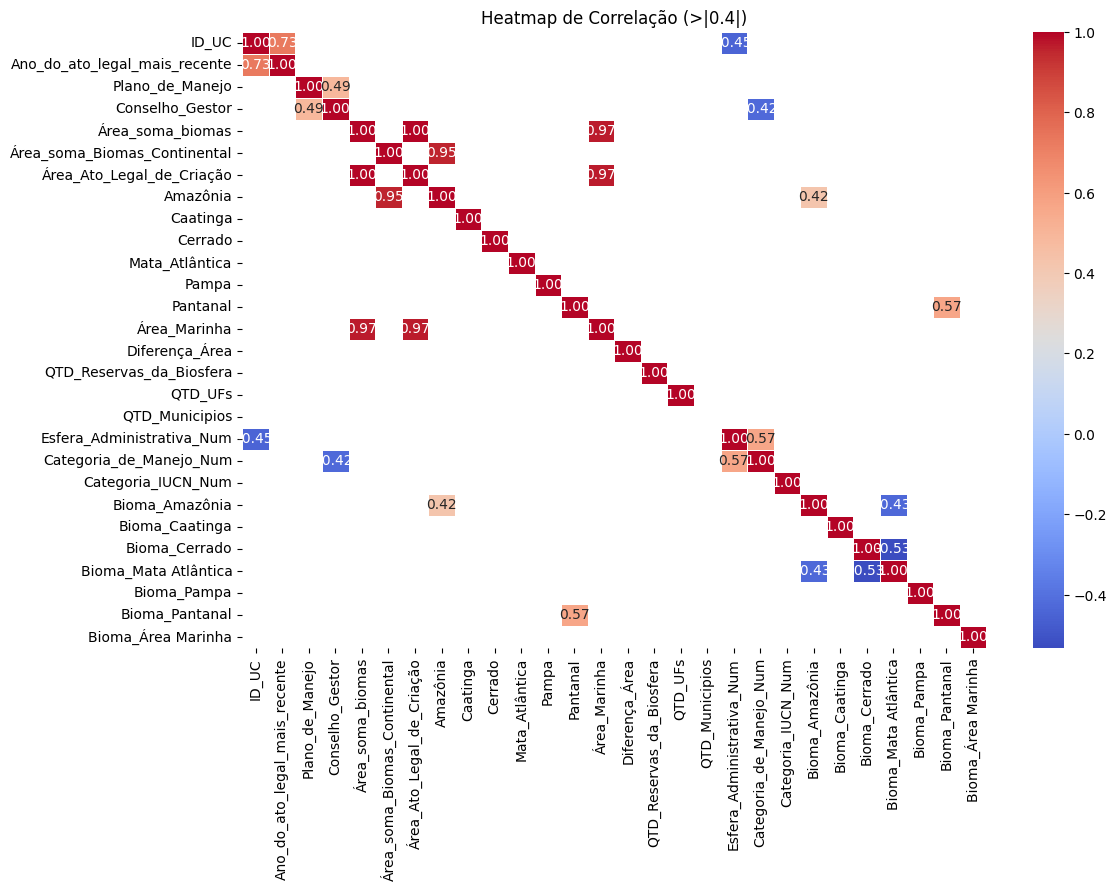

In [37]:
def plot_filtered_correlation_heatmap(df, threshold=0.4):
    # Selecionando apenas as variáveis numéricas do DataFrame
    df_numeric = df.select_dtypes(include=['int64', 'float64'])

    # Calculando a matriz de correlação
    corr_matrix = df_numeric.corr()

    # Aplicando o filtro: substitui valores entre -threshold e threshold por NaN
    corr_filtered = corr_matrix.mask((corr_matrix > -threshold) & (corr_matrix < threshold), np.nan)

    # Configurando o tamanho do gráfico
    plt.figure(figsize=(12, 8))

    # Criando o heatmap com a matriz de correlação filtrada
    sns.heatmap(corr_filtered, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, mask=np.isnan(corr_filtered))

    # Exibindo o gráfico
    plt.title(f'Heatmap de Correlação (>|{threshold}|)')
    plt.show()

# Exemplo de uso
plot_filtered_correlation_heatmap(df, threshold=0.4)


# Colunas mais bem relacionadas

```
Plano_de_Manejo         	                                      
Conselho_Gestor           +0.49

Conselho_Gestor
Categoria_de_Manejo_Num 	-0.42

Esfera_Administrativa_Num
Categoria_de_Manejo_Num 	+0.57

Área_Ato_Legal_de_Criação
Área_soma_biomas		      +1.0

```

## Algorimos escolhidos

1. **Regressão Linear**

A regressão linear é um método estatístico que modela a relação entre uma variável dependente (target) e uma ou mais variáveis independentes (features) utilizando uma linha reta. O principal objetivo da regressão linear é prever valores contínuos, fazendo suposições sobre a linearidade entre as variáveis.

2. **Árvore de Decisão**

As árvores de decisão são modelos que utilizam uma estrutura em árvore para fazer previsões. Cada nó da árvore representa uma decisão sobre uma variável, e as folhas representam os resultados (valores preditivos).

3. **Random Forest**

O Random Forest é um ensemble de árvores de decisão que cria várias árvores e combina suas previsões. Cada árvore é treinada em uma amostra aleatória do conjunto de dados, e a previsão final é feita através da média (ou votação, no caso de classificação) das previsões das árvores.

4. **Gradient Boosting (XGBoost)**

O Gradient Boosting é outra técnica de ensemble que combina previsões de várias árvores de decisão, mas de uma forma diferente. Ele treina árvores de forma sequencial, onde cada nova árvore corrige os erros das árvores anteriores.

## Métricas de Avaliação

- O MSE calcula a média dos erros ao quadrado entre os valores reais (observados) e os valores previstos pelo modelo. É uma medida que quantifica o quão próximos os valores previstos estão dos valores reais.

- O R² mede a proporção da variância total nos dados que é explicada pelo modelo. Em termos simples, ele indica o quão bem o modelo consegue prever os resultados, com base nas variáveis independentes.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [43]:
# Função para os algoritmos escolhidos
def train_and_evaluate_models(X, y, test_size=0.2, random_state=42):
    # Dividindo os dados em conjunto de treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Dicionário para armazenar os resultados
    results = {}

    # Lista de modelos
    models = {
        'Regressão Linear': LinearRegression(),
        'Árvore de Decisão': DecisionTreeRegressor(random_state=random_state),
        'Random Forest': RandomForestRegressor(random_state=random_state),
        'XGBoost': XGBRegressor(random_state=random_state)
    }

    # Treinando e avaliando cada modelo
    for name, model in models.items():
        # Treinando o modelo
        model.fit(X_train, y_train)

        # Fazendo previsões
        y_pred = model.predict(X_test)

        # Avaliando o modelo
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Armazenando os resultados
        results[name] = {
            'MSE': mse,
            'R²': r2,
            'Modelo': model
        }

    return results

# Função para salvar o modelo melhor avalido
def save_best_model(results):
    # Encontrando o modelo com o maior R2
    best_model_name = max(results, key=lambda x: results[x]['R²'])
    best_model = results[best_model_name]['Modelo']

    # Salvando o melhor modelo em um arquivo
    joblib.dump(best_model, f'{best_model_name.replace(" ", "_")}.joblib')

    print(f'Melhor modelo: {best_model_name} com R²: {results[best_model_name]["R²"]:.4f}')
    print(f'Modelo salvo como: {best_model_name.replace(" ", "_")}.joblib')

X = df[['Conselho_Gestor', 'Esfera_Administrativa_Num', 'Categoria_de_Manejo_Num', 'Área_Ato_Legal_de_Criação', 'Plano_de_Manejo']]
y = df['Área_soma_biomas']

results = train_and_evaluate_models(X, y)
save_best_model(results)

Melhor modelo: Regressão Linear com R²: 0.9858
Modelo salvo como: Regressão_Linear.joblib


Os resultados para comparação são:

```
'Regressão Linear': {'MSE': 796394564.1392885, 'R²': 0.9858240294885511},
'Árvore de Decisão': {'MSE': 11976641796.818886, 'R²': 0.7868135612887018},
'Random Forest': {'MSE': 4356791808.066086, 'R²': 0.9224483001558194},
'XGBoost': {'MSE': 3585097202.655634, 'R²': 0.9361846068343636}
```

## Inferência

 - relembrando os dados

```
    - Conselho_Gestor:            1:Sim, 0: Não
    - Esfera_Administrativa_Num:  1: Municipal, 2: Estadual, 3: Federal
    - Categoria_de_Manejo_Num:    1: Área de Proteção Ambiental,
                                  2: Área de Relevante Interesse Ecológico,
                                  3: Monumento Natural,
                                  4: Estação Ecológica,
                                  5: Parque,
                                  6: Floresta,
                                  7: Refúgio de Vida Silvestre,
                                  8: Reserva Biológica,
                                  9: Reserva de Desenvolvimento Sustentável,
                                  10: Reserva Extrativista,
                                  11: Reserva Particular do Patrimônio Natural
    - Área_Ato_Legal_de_Criação:  KM2
    - Plano_de_Manejo:            1:Sim, 0: Não
```


In [52]:
# Carregar o modelo
model = joblib.load('/content/Regressão_Linear.joblib')

# Preparando novos dados para prever
new_data = pd.DataFrame({
    'Conselho_Gestor': [1, 0],
    'Esfera_Administrativa_Num': [1, 3],
    'Categoria_de_Manejo_Num': [1, 5],
    'Área_Ato_Legal_de_Criação': [1000, 200],
    'Plano_de_Manejo': [1, 0]
})

# Fazendo previsões com o modelo carregado
predictions = model.predict(new_data)

# Exibindo as previsões
for prediction in predictions:
    print(f"Uma nova área com os dados fornecidos terá a soma da área de: {prediction:.2f} km")

Uma nova área com os dados fornecidos terão área de: 6307.42 km
Uma nova área com os dados fornecidos terão área de: 5681.10 km
